# Problem Statement

#### The goal of this notebook is to build a Natural Language Processing Model that analyzes sentiments of tweets about Apple products.
### The task is to classify tweets based on their sentiments towards Apple products and the sentiment categories are:
#### i.Positive sentiment:Tweet expresses a favourable opinion
#### ii.Negative sentiment:Tweet expresses a negative or critical opinion

# Objectives:

### 1.Sentiment Classification:
#### We create a binary sentiment classifier to distinguish between positve and negative sentiments
### 2.Model Evaluation:
#### Evaluate the model using performance metrics such as accuracy & precision scores and visualize a confusion matrix to understand the performance of the model

#### By analyizing sentiments on Twitter about Apple products, this model can help businesses track public perception, manage brand reputation and better understand consumer feedback

# Steps Overview:
#### 1.EDA, Data Cleaning & preprocessing
#### 2.Text Vectorization
#### 3.Model Training & Evaluation(Binary Classification)
#### 4.Ensemble Methods for continous improvement
#### 5.Model Deployment
#### 6.Coninuous Model Improvement 



### Step 1: EDA, Data Cleaning & Preprocessing
#### Import required libraries

In [186]:
#Import all libraries for data cleaning & preprocessing 

import pandas as pd
import numpy as np
import re
import string
from sklearn.model_selection import train_test_split
import unicodedata
import warnings
warnings.filterwarnings('ignore')

#### Load & inspect the Dataset

In [187]:
with open('judge-1377884607_tweet_product_company.csv','r', encoding='utf-8', errors='replace') as file:
    df = pd.read_csv(file)
df.head(10)


,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
6,NaN,NaN,No emotion toward brand or product
7,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
8,Beautifully smart and simple idea RT @madebyma...,iPad or iPhone App,Positive emotion
9,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion


In [188]:
df.info() # Basic info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [189]:
# Changing column names
df.rename(columns={'tweet_text':'text','is_there_an_emotion_directed_at_a_brand_or_product':'sentiment'}, inplace=True)
df

,text,emotion_in_tweet_is_directed_at,sentiment
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [190]:
df.shape

(9093, 3)

In [191]:
df.isnull().sum() # Checking for null values

text                                  1
emotion_in_tweet_is_directed_at    5802
sentiment                             0
dtype: int64

In [192]:
df.duplicated().sum()

22

In [193]:
# Veiwing duplicates
df[df.duplicated()]

,text,emotion_in_tweet_is_directed_at,sentiment
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive emotion
776,Google to Launch Major New Social Network Call...,NaN,No emotion toward brand or product
2232,Marissa Mayer: Google Will Connect the Digital...,NaN,No emotion toward brand or product
2559,Counting down the days to #sxsw plus strong Ca...,Apple,Positive emotion
3950,Really enjoying the changes in Gowalla 3.0 for...,Android App,Positive emotion
3962,"#SXSW is just starting, #CTIA is around the co...",Android,Positive emotion
4897,"Oh. My. God. The #SXSW app for iPad is pure, u...",iPad or iPhone App,Positive emotion
5338,RT @mention ��� GO BEYOND BORDERS! ��_ {link} ...,NaN,No emotion toward brand or product
5341,"RT @mention ��� Happy Woman's Day! Make love, ...",NaN,No emotion toward brand or product
5881,RT @mention Google to Launch Major New Social ...,NaN,No emotion toward brand or product


In [194]:
# Dropping duplicates
df1 = df.drop_duplicates()

In [195]:
# Summary Statistics
df1.describe()

,text,emotion_in_tweet_is_directed_at,sentiment
count,9070,3282,9071
unique,9065,9,4
top,RT @mention Marissa Mayer: Google Will Connect...,iPad,No emotion toward brand or product
freq,2,945,5376


In [196]:
df1['text'].dtype

dtype('O')

In [197]:
df1['text'] = df['text'].astype(str)

In [198]:
# Data Cleaning:Removing unwanted characters

def clean_text(text):
    text = text.lower()  # Covert to Lowercase
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'@\S+', '', text)  # remove mentions
    text = re.sub(r'#[a-zA-Z0-9_]+', '', text)  # remove hashtags
    text = re.sub(r'\d+', '', text)  # remove digits
    text = text.translate(str.maketrans('','', string.punctuation))  # remove puntuations
    text = re.sub(r'\s+', '', text).strip()  # remove extra spaces
    text = re.sub(r'[^\x00-\x7F]+', '', text) # remove any non-ASCII characters
    text = unicodedata.normalize('NFC', text) # Normalize the text to unicode NFC form
    return text


In [199]:
# Applying cleaning to text column

df1['text'] = df1['text'].apply(clean_text)
df1['text']

0       ihaveagiphoneafterhrstweetingatitwasdeadineedt...
1       knowaboutawesomeipadiphoneappthatyoulllikelyap...
2               cannotwaitforalsotheyshouldsalethemdownat
3       ihopethisyearsfestivalisntascrashyasthisyearsi...
4       greatstuffonfrimarissamayergoogletimoreillytec...
                              ...                        
9088                                   ipadeverywherelink
9089    wavebuzzrtweinterruptyourregularlyscheduledgee...
9090    googleszeigeraphysicianneverreportedpotentiala...
9091    someverizoniphonecustomerscomplainedtheirtimef...
9092                     rtgoogletestscheckinoffersatlink
Name: text, Length: 9071, dtype: object

In [200]:
# Checking contents of sentiment column

df['sentiment']

0                         Negative emotion
1                         Positive emotion
2                         Positive emotion
3                         Negative emotion
4                         Positive emotion
                       ...                
9088                      Positive emotion
9089    No emotion toward brand or product
9090    No emotion toward brand or product
9091    No emotion toward brand or product
9092    No emotion toward brand or product
Name: sentiment, Length: 9093, dtype: object

In [201]:
# Filter out neutral sentiment for binray classification

df1_binary = df1[df1['sentiment'] != 'No emotion toward brand or product']

# Map sentiment to binary labels

df1['sentiment'] = df1_binary['sentiment'].map({'Positive emotion':1, 'Negative emotion':0})

In [202]:
# Confirming sentiment columns have been  assigned binary labels

df1['sentiment']

0       0.0
1       1.0
2       1.0
3       0.0
4       1.0
       ... 
9088    1.0
9089    NaN
9090    NaN
9091    NaN
9092    NaN
Name: sentiment, Length: 9071, dtype: float64

In [203]:
# Splitting the data into features (X) & (Y) labels

X = df1_binary['text']
y = df1_binary['sentiment']

# Applying Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Step 2: Text Vectorization
#### We clean convert the cleaned data into a format suitable or the machine learning model.
#### In this case we will use TF-IDF(Term Frequency-Inverse Document Frequency) to convert text to numerical vectors

In [204]:
# Import necessary library

from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF Vectorizer

tfidf = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Check the shape of the vectors

X_train_tfidf.shape

(2956, 2902)

### Step 3: Model Training & Evaluation
#### For binary classification(negative or positive sentiment), we will train a basic Logistic regression model


In [205]:
# Import necessary libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize & train Logistic Regression model

model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Make predictions

y_pred = model.predict(X_test_tfidf)

# Evaluate the model

accuracy =accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')


Accuracy: 79.97%


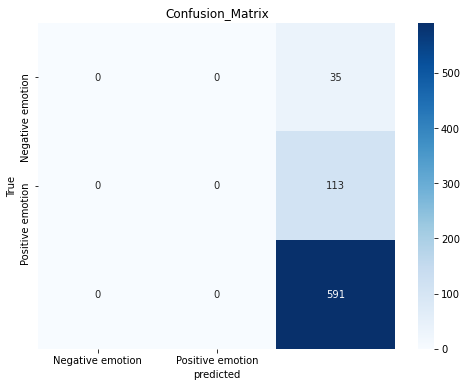

In [206]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative emotion', 'Positive emotion'], yticklabels=['Negative emotion', 'Positive emotion'])
plt.xlabel('predicted')
plt.ylabel('True')
plt.title('Confusion_Matrix')
plt.show()

In [207]:
# Detailed Classification Report
print(classification_report(y_test,y_pred))

                  precision    recall  f1-score   support

    I can't tell       0.00      0.00      0.00        35
Negative emotion       0.00      0.00      0.00       113
Positive emotion       0.80      1.00      0.89       591

        accuracy                           0.80       739
       macro avg       0.27      0.33      0.30       739
    weighted avg       0.64      0.80      0.71       739



### Step 4 : Ensemble Methods for continous improvemnt
#### In this case we use Random Forest and Gradient Boosting for better performance


In [208]:
#Import necessary libraries

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_tfidf, y_train)

gb_model = GradientBoostingClassifier(n_estimators=100)
gb_model.fit(X_train_tfidf, y_train)

# Evaluate the ensemble models
rf_pred = rf_model.predict(X_test_tfidf)
gb_pred = gb_model.predict(X_test_tfidf)

rf_accuracy = accuracy_score(y_test, rf_pred)
gb_accuracy = accuracy_score(y_test, gb_pred)

print("Random Forest Accuracy:", rf_accuracy)
print("Gradient Boosting Accuracy:", gb_accuracy)


Random Forest Accuracy: 0.8010825439783491
Gradient Boosting Accuracy: 0.7997293640054127


### Step 5 : Model Deployment
#### Now that we have our final model, we can save it for deployment using joblib


In [209]:
# Import Joblib

import joblib

# Save the trained model
joblib.dump(rf_model, 'sentiment_analysis_model.pkl')

# Save the TfidfVectorizer
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')


['tfidf_vectorizer.pkl']

#### Deploying the model

In [210]:
from flask import Flask, request, jsonify
import joblib

app = Flask(__name__)

# Load the saved model and vectorizer
model = joblib.load('sentiment_analysis_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

@app.route('/predict', methods=['POST'])
def predict_sentiment():
    text = request.json['text']
    text_tfidf = vectorizer.transform([text])
    prediction = model.predict(text_tfidf)
    sentiment = encoder.inverse_transform(prediction)
    return jsonify({'sentiment': sentiment[0]})

if __name__ == '__main__':
    app.run(debug=True)



 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
 * Restarting with stat


SystemExit: 1

### Step 6: Continous Model Improvement
#### As new data becomes avaialble, you can periodically retrain the model
#### Continuosly monitor performance over time and retrain the model if performance dips
